<a href="https://colab.research.google.com/github/vugiachien/Python_Pravite/blob/main/Nh%C3%B3m_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import thư viện

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


In [ ]:
# Đọc dữ liệu lên DataFrame
dataFrame = pd.read_csv('/content/cardekho.csv', sep=';')

# THỐNG KÊ VÀ TÌM HIỂU DỮ LIỆU

---



In [ ]:
# Hiển thị 15 dòng dữ liệu đầu tiên
dataFrame.head(15)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.5,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.1,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.1,5.0


In [ ]:
# In thông tin các cột trong DF
dataFrame['max_power'] = pd.to_numeric(dataFrame['max_power'], errors='coerce')
dataFrame.info()
print('Shape tập dữ liệu: ', dataFrame.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7912 non-null   float64
 11  seats               7907 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 762.1+ KB
Shape tập dữ liệu:  (8128, 12)


## Phân tích các cột dữ liệu kiểu phi số

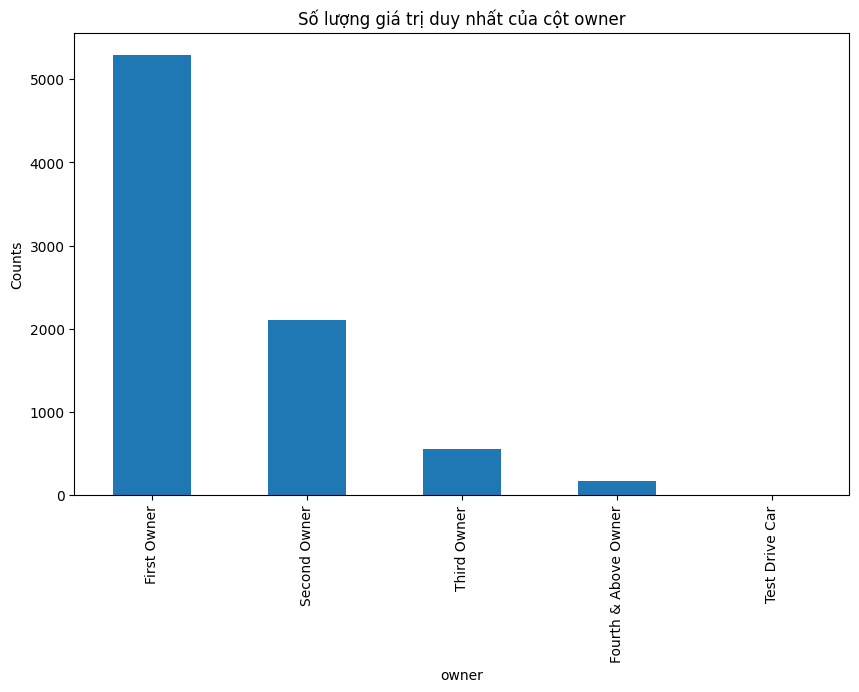

In [ ]:
def plt_categories_counts(label_name):
    counts = dataFrame[label_name].value_counts()
    plt.figure(figsize=(10, 6))
    counts.plot(kind='bar')
    plt.title(f'Số lượng giá trị duy nhất của cột {label_name}')
    plt.xlabel(label_name)
    plt.ylabel('Counts')
    plt.show()

# Đếm các giá trị duy nhất của các cột có Dtype phi số
plt_categories_counts('owner')



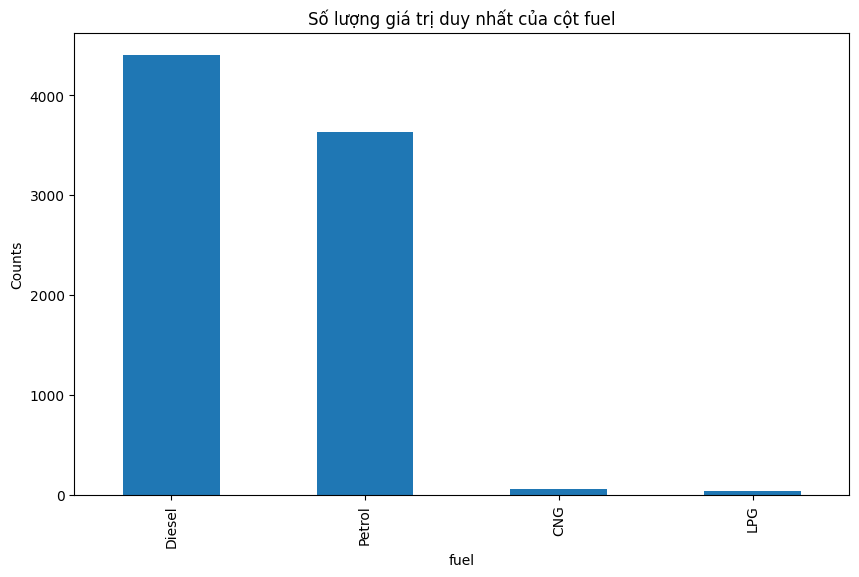

In [ ]:
plt_categories_counts('fuel')

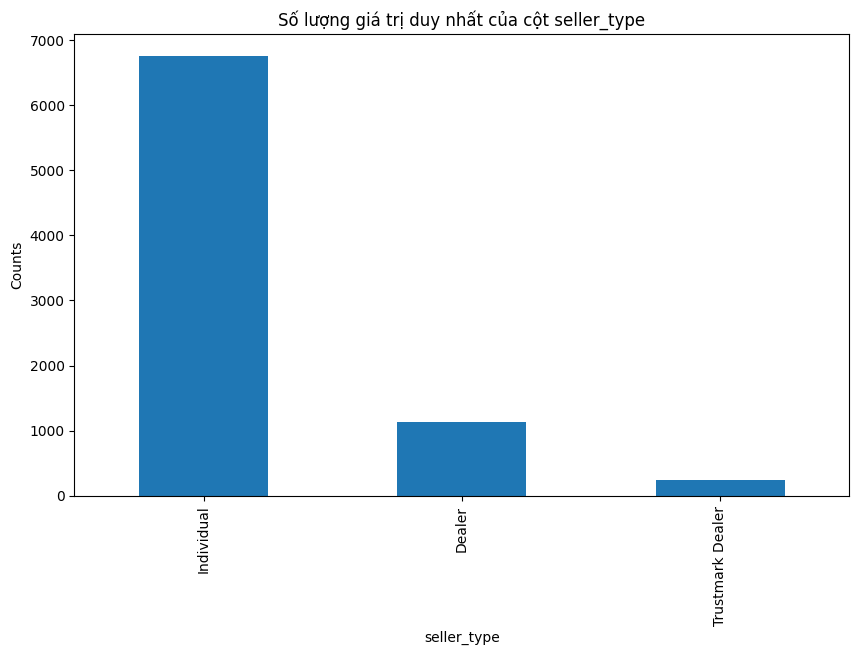

In [ ]:
plt_categories_counts('seller_type')

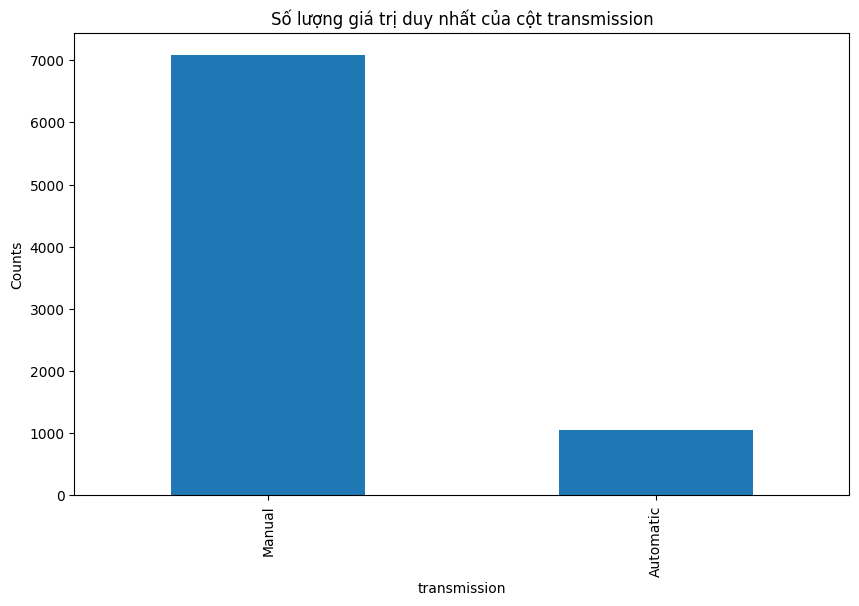

In [ ]:
plt_categories_counts('transmission')

In [ ]:
def categories_counts(label_name):
    print(f'-----------------------------------------------')
    print(f'Số các giá trị duy nhất của cột {label_name}:')
    print(dataFrame[label_name].value_counts())

# Đếm các giá trị duy nhất của các cột có Dtype phi số
categories_counts('owner')
categories_counts('fuel')
categories_counts('seller_type')
categories_counts('transmission')

-----------------------------------------------
Số các giá trị duy nhất của cột owner:
owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64
-----------------------------------------------
Số các giá trị duy nhất của cột fuel:
fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64
-----------------------------------------------
Số các giá trị duy nhất của cột seller_type:
seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64
-----------------------------------------------
Số các giá trị duy nhất của cột transmission:
transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64


## Kiểm tra mức độ sạch của dữ liệu

In [ ]:
def statistical_missing_data(df):
    missing_data = df.isnull().sum()
    duplicate_data = df.duplicated().sum()

    print("Số liệu thiếu trong mỗi cột:")
    print(missing_data)
    print("\nSố liệu trùng lặp:")
    print(duplicate_data)

# Thống kê dữ liệu khuyết
statistical_missing_data(dataFrame)

Số liệu thiếu trong mỗi cột:
name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             216
seats                 221
dtype: int64

Số liệu trùng lặp:
1202


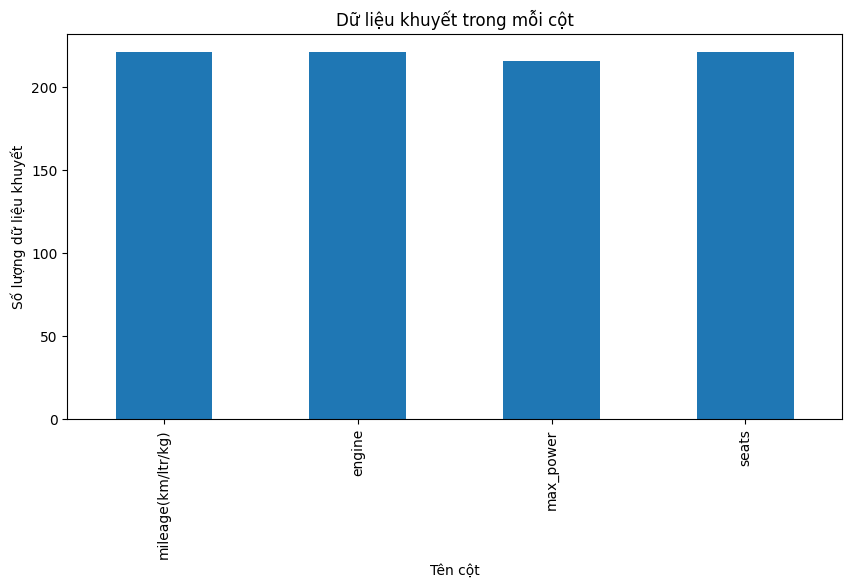


Số liệu trùng lặp: 1202


In [ ]:
def plt_statistics_missing_data(dataFrame):
    # Dữ liệu khuyết
    missing_data = dataFrame.isnull().sum()
    missing_data = missing_data[missing_data > 0]
    plt.figure(figsize=(10, 5))
    missing_data.plot(kind='bar')
    plt.title('Dữ liệu khuyết trong mỗi cột')
    plt.xlabel('Tên cột')
    plt.ylabel('Số lượng dữ liệu khuyết')
    plt.show()

    # Dữ liệu lặp
    duplicate_data = dataFrame.duplicated().sum()
    print("\nSố liệu trùng lặp:", duplicate_data)

# Thống kê dữ liệu khuyết
plt_statistics_missing_data(dataFrame)

## Loại bỏ cột

In [ ]:
print('Shape tập dữ liệu trước khi xóa cột:\t', dataFrame.shape)
# Bỏ các cột không còn cần thiết
dataFrame = dataFrame.drop('seller_type', axis=1)
print('Shape tập dữ liệu sau khi xóa cột:\t', dataFrame.shape)

Shape tập dữ liệu trước khi xóa cột:	 (8128, 12)
Shape tập dữ liệu sau khi xóa cột:	 (8128, 11)


In [ ]:
# Kết quả sau khi xóa cột
dataFrame.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Manual,First Owner,16.10,1298.0,88.20,5.0


## Trích xuất các giá trị số

In [ ]:
# Trích xuất các cột giá trị số
data_numeric = dataFrame.select_dtypes(include=['number'])
print(data_numeric)

      year  selling_price  km_driven  mileage(km/ltr/kg)  engine  max_power  \
0     2014         450000     145500               23.40  1248.0      74.00   
1     2014         370000     120000               21.14  1498.0     103.52   
2     2006         158000     140000               17.70  1497.0      78.00   
3     2010         225000     127000               23.00  1396.0      90.00   
4     2007         130000     120000               16.10  1298.0      88.20   
...    ...            ...        ...                 ...     ...        ...   
8123  2013         320000     110000               18.50  1197.0      82.85   
8124  2007         135000     119000               16.80  1493.0     110.00   
8125  2009         382000     120000               19.30  1248.0      73.90   
8126  2013         290000      25000               23.57  1396.0      70.00   
8127  2013         290000      25000               23.57  1396.0      70.00   

      seats  
0       5.0  
1       5.0  
2       5

## Kiểm tra lại dữ liệu khuyết sau khi trích xuất các giá trị số

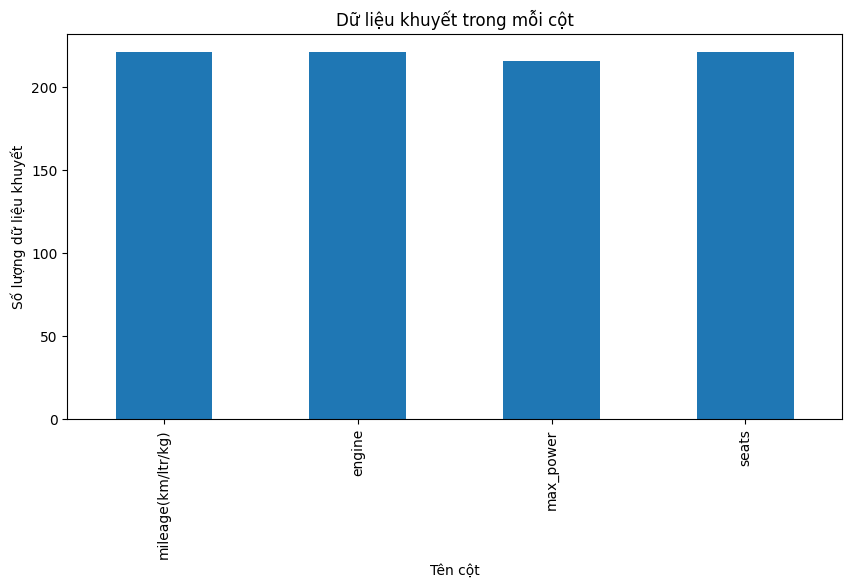


Số liệu trùng lặp: 1251


In [ ]:
# Thống kê dữ liệu khuyết
plt_statistics_missing_data(data_numeric)

In [ ]:
# Thống kê dữ liệu khuyết sau khi trích xuất giá trị số
statistical_missing_data(data_numeric)

Số liệu thiếu trong mỗi cột:
year                    0
selling_price           0
km_driven               0
mileage(km/ltr/kg)    221
engine                221
max_power             216
seats                 221
dtype: int64

Số liệu trùng lặp:
1251


## Điền khuyết dữ liệu

### Lựa chọn giá trị điền khuyết


In [ ]:
# Đếm các giá trị duy nhất của các cột có giá trị số
# để xác định giá trị mode
categories_counts('max_power')


-----------------------------------------------
Số các giá trị duy nhất của cột max_power:
max_power
74.00     377
88.50     222
81.80     220
67.00     165
46.30     162
         ... 
58.33       1
68.40       1
169.00      1
170.63      1
135.10      1
Name: count, Length: 319, dtype: int64


### Điền khuyết giữ liệu

In [ ]:
# Điền khuyết bằng giá trị Mode
def fillna_with_mode(data_numeric):
    df_missing = data_numeric.isnull()
    df_filled = data_numeric.fillna(df_missing.mean())
    print(df_filled)
    print('SỐ giá trị khuyết của các cột sau khi điền khuyết')
    print(df_filled.isnull().sum())

fillna_with_mode(data_numeric)
# Kết quả
dataFrame.head()

      year  selling_price  km_driven  mileage(km/ltr/kg)  engine  max_power  \
0     2014         450000     145500               23.40  1248.0      74.00   
1     2014         370000     120000               21.14  1498.0     103.52   
2     2006         158000     140000               17.70  1497.0      78.00   
3     2010         225000     127000               23.00  1396.0      90.00   
4     2007         130000     120000               16.10  1298.0      88.20   
...    ...            ...        ...                 ...     ...        ...   
8123  2013         320000     110000               18.50  1197.0      82.85   
8124  2007         135000     119000               16.80  1493.0     110.00   
8125  2009         382000     120000               19.30  1248.0      73.90   
8126  2013         290000      25000               23.57  1396.0      70.00   
8127  2013         290000      25000               23.57  1396.0      70.00   

      seats  
0       5.0  
1       5.0  
2       5

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Manual,First Owner,16.10,1298.0,88.20,5.0


In [ ]:
# Tìm các giá trị duy nhất để chuẩn bị từ điển mapping
categories_counts('fuel')
categories_counts('transmission')
categories_counts('owner')

-----------------------------------------------
Số các giá trị duy nhất của cột fuel:
fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64
-----------------------------------------------
Số các giá trị duy nhất của cột transmission:
transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64
-----------------------------------------------
Số các giá trị duy nhất của cột owner:
owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64


In [ ]:
# Ánh xạ các giá trị phân loại thành nhãn kiểu số
def map_categorical(col_name, dictionary):
    dataFrame[col_name] = dataFrame[col_name].map(dictionary)

fuel_type_mapping = {'CNG': 1, 'Diesel': 2, 'Petrol': 3, 'LPG': 4}
transmission_type_mapping = {'Manual': 1, 'Automatic': 2}
owner_type_mapping = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5}

map_categorical('fuel', fuel_type_mapping)
map_categorical('transmission', transmission_type_mapping)
map_categorical('owner', owner_type_mapping)

# Kết quả sau khi ánh xạ
dataFrame.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,2,1,1,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,2,1,2,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,3,1,3,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,2,1,1,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,3,1,1,16.10,1298.0,88.20,5.0


# TÓM LƯỢC DỮ LIỆU

In [ ]:
# def describe_data(df):
#     # Select only numeric columns
#     numeric_df = df.select_dtypes(include=['number'])

#     data_describe = {
#         'Count': numeric_df.count(),
#         'Min': numeric_df.min(),
#         'Max': numeric_df.max(),
#         'Mean': numeric_df.mean(),
#         'Mode': numeric_df.mode().iloc[0],  # mode() return a DataFrame
#         '25%': numeric_df.quantile(0.25),
#         '50%': numeric_df.median(),
#         '75%': numeric_df.quantile(0.75),
#         'IQR': numeric_df.quantile(0.75) - numeric_df.quantile(0.25),
#         'Variance': numeric_df.var(),
#         'STD': numeric_df.std()
#     }
#     return pd.DataFrame(data_describe).T

# describe_data(dataFrame)
data_numeric_describe = data_numeric.describe(include='all')
print(data_numeric_describe)

              year  selling_price     km_driven  mileage(km/ltr/kg)  \
count  8128.000000   8.128000e+03  8.128000e+03         7907.000000   
mean   2013.804011   6.382718e+05  6.981951e+04           19.418783   
std       4.044249   8.062534e+05  5.655055e+04            4.037145   
min    1983.000000   2.999900e+04  1.000000e+00            0.000000   
25%    2011.000000   2.549990e+05  3.500000e+04           16.780000   
50%    2015.000000   4.500000e+05  6.000000e+04           19.300000   
75%    2017.000000   6.750000e+05  9.800000e+04           22.320000   
max    2020.000000   1.000000e+07  2.360457e+06           42.000000   

            engine    max_power        seats  
count  7907.000000  7912.000000  7907.000000  
mean   1458.625016    91.517919     5.416719  
std     503.916303    35.822499     0.959588  
min     624.000000     0.000000     2.000000  
25%    1197.000000    68.050000     5.000000  
50%    1248.000000    82.000000     5.000000  
75%    1582.000000   102.000000

In [ ]:
data_numeric['selling_price'].describe()

,selling_price
count,8.128000e+03
mean,6.382718e+05
std,8.062534e+05
min,2.999900e+04
25%,2.549990e+05
50%,4.500000e+05
75%,6.750000e+05
max,1.000000e+07


# CHUYỂN ĐỔI DỮ LIỆU

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def min_max_nor(data, column):
    col = np.array(data[column]).reshape(-1, 1)
    scaler = MinMaxScaler()
    data[column] = scaler.fit_transform(col)
    return data

# Example usage:
df_minmax_nor = min_max_nor(data_numeric, 'selling_price')
df_minmax_nor = min_max_nor(data_numeric, 'mileage(km/ltr/kg)')
df_minmax_nor.head(10)

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,max_power,seats
0,2014,0.042126,145500,0.557143,1248.0,74.00,5.0
1,2014,0.034102,120000,0.503333,1498.0,103.52,5.0
2,2006,0.012839,140000,0.421429,1497.0,78.00,5.0
3,2010,0.019559,127000,0.547619,1396.0,90.00,5.0
4,2007,0.010030,120000,0.383333,1298.0,88.20,5.0
5,2017,0.041123,45000,0.479524,1197.0,81.86,5.0
6,2007,0.006620,175000,0.411905,1061.0,57.50,5.0
7,2001,0.001505,5000,0.383333,796.0,37.00,4.0
8,2011,0.032096,90000,0.561667,1364.0,67.10,5.0
9,2013,0.017051,169000,0.476190,1399.0,68.10,5.0


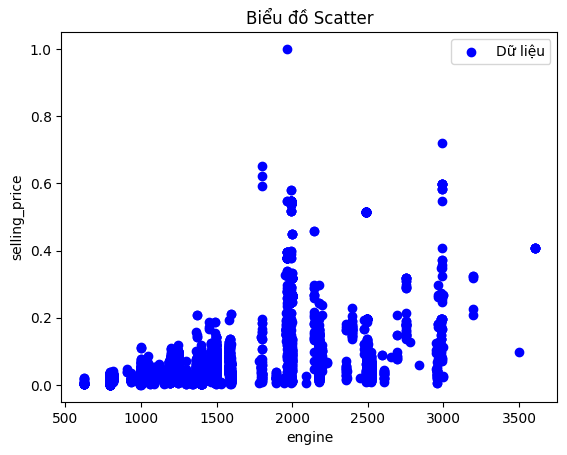

In [ ]:
column1 = data_numeric['engine']
column2 = data_numeric['selling_price']
plt.scatter(column1, column2, label='Dữ liệu', color='blue', marker='o')
plt.title('Biểu đồ Scatter')
plt.xlabel('engine')
plt.ylabel('selling_price')
plt.legend()
plt.show()

<Axes: >

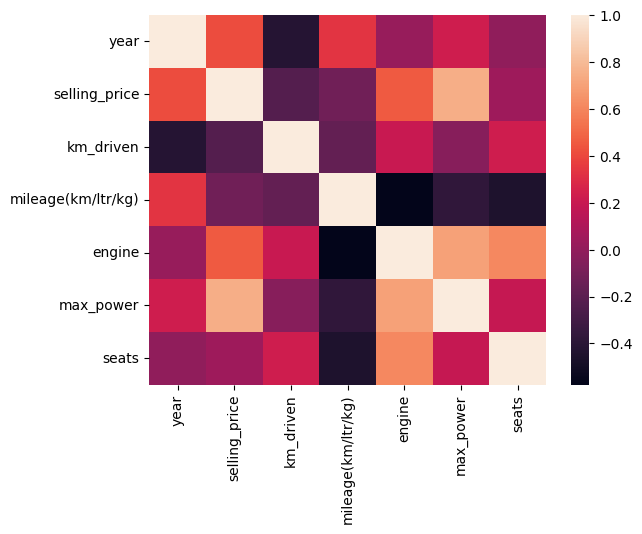

In [ ]:
sns.heatmap(data_numeric.corr())

# Mô tả dữ liệu

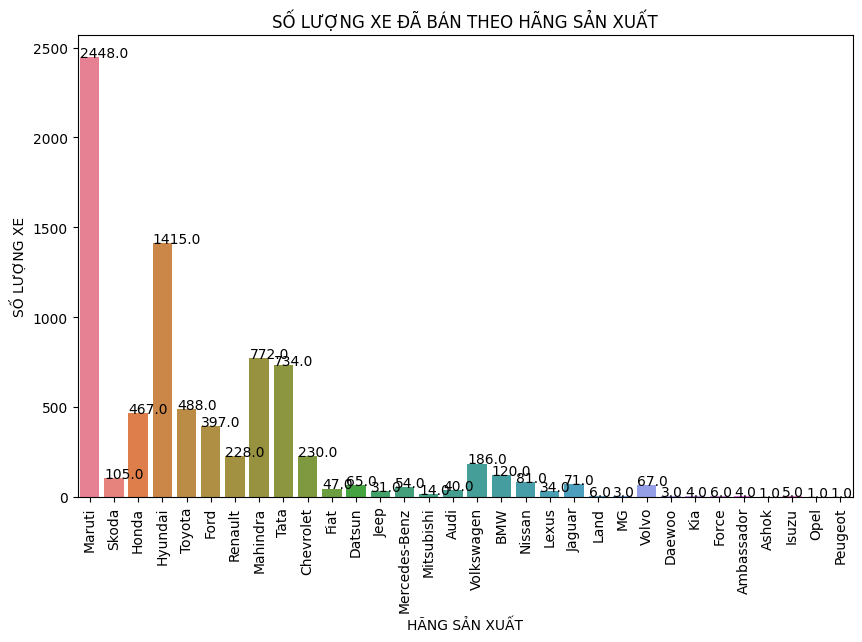

In [ ]:
split_name = dataFrame["name"].str.split(" ", expand=True)
dataFrame["Manufacturer"] = split_name[0]

# Đặt màu cho các cột
colors = sns.color_palette("husl", len(dataFrame["Manufacturer"].unique()))

# Tạo các cột với màu chỉ định
plt.figure(figsize=(10, 6))
plot = sns.countplot(x='Manufacturer', data=dataFrame, hue='Manufacturer', palette=colors, legend=False)
plt.xticks(rotation=90)

# Lấy các giá trị trên các cột
for p in plot.patches:
    plot.annotate(
        p.get_height(),
        (p.get_x() + p.get_width() / 2000.00, p.get_height()),
    )

plt.title("SỐ LƯỢNG XE ĐÃ BÁN THEO HÃNG SẢN XUẤT")
plt.xlabel("HÃNG SẢN XUẤT")
plt.ylabel("SỐ LƯỢNG XE")
plt.show()

<ipython-input-164-633c68ebd3ce>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_prices, x='year', y='selling_price', palette='viridis')


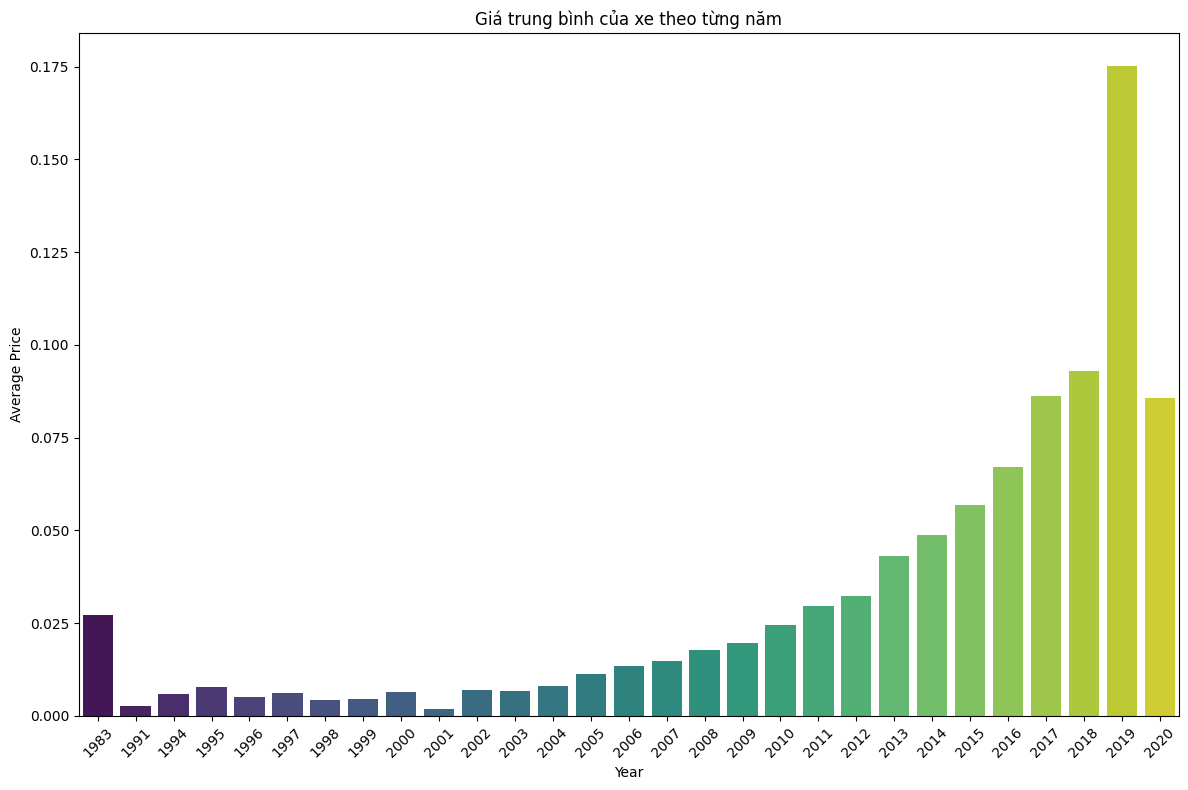

In [ ]:
average_prices = data_numeric.groupby('year')['selling_price'].mean().reset_index()

# Vẽ biểu đồ cột
plt.figure(figsize=(12, 8))
sns.barplot(data=average_prices, x='year', y='selling_price', palette='viridis')
plt.title('Giá trung bình của xe theo từng năm')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

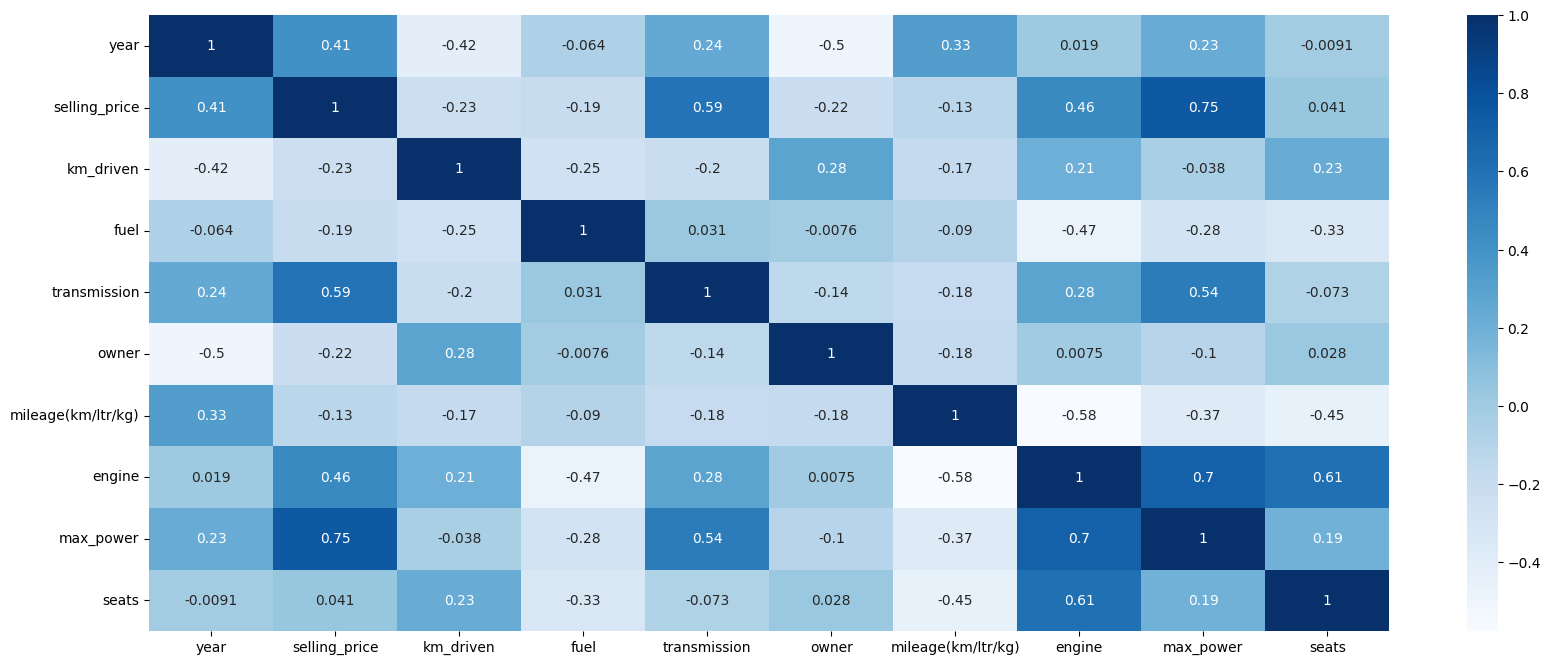

In [ ]:
plt.figure(figsize = (20,8))
sns.heatmap(dataFrame.corr(numeric_only = True), annot = True, cmap = plt.cm.Blues)
plt.show()

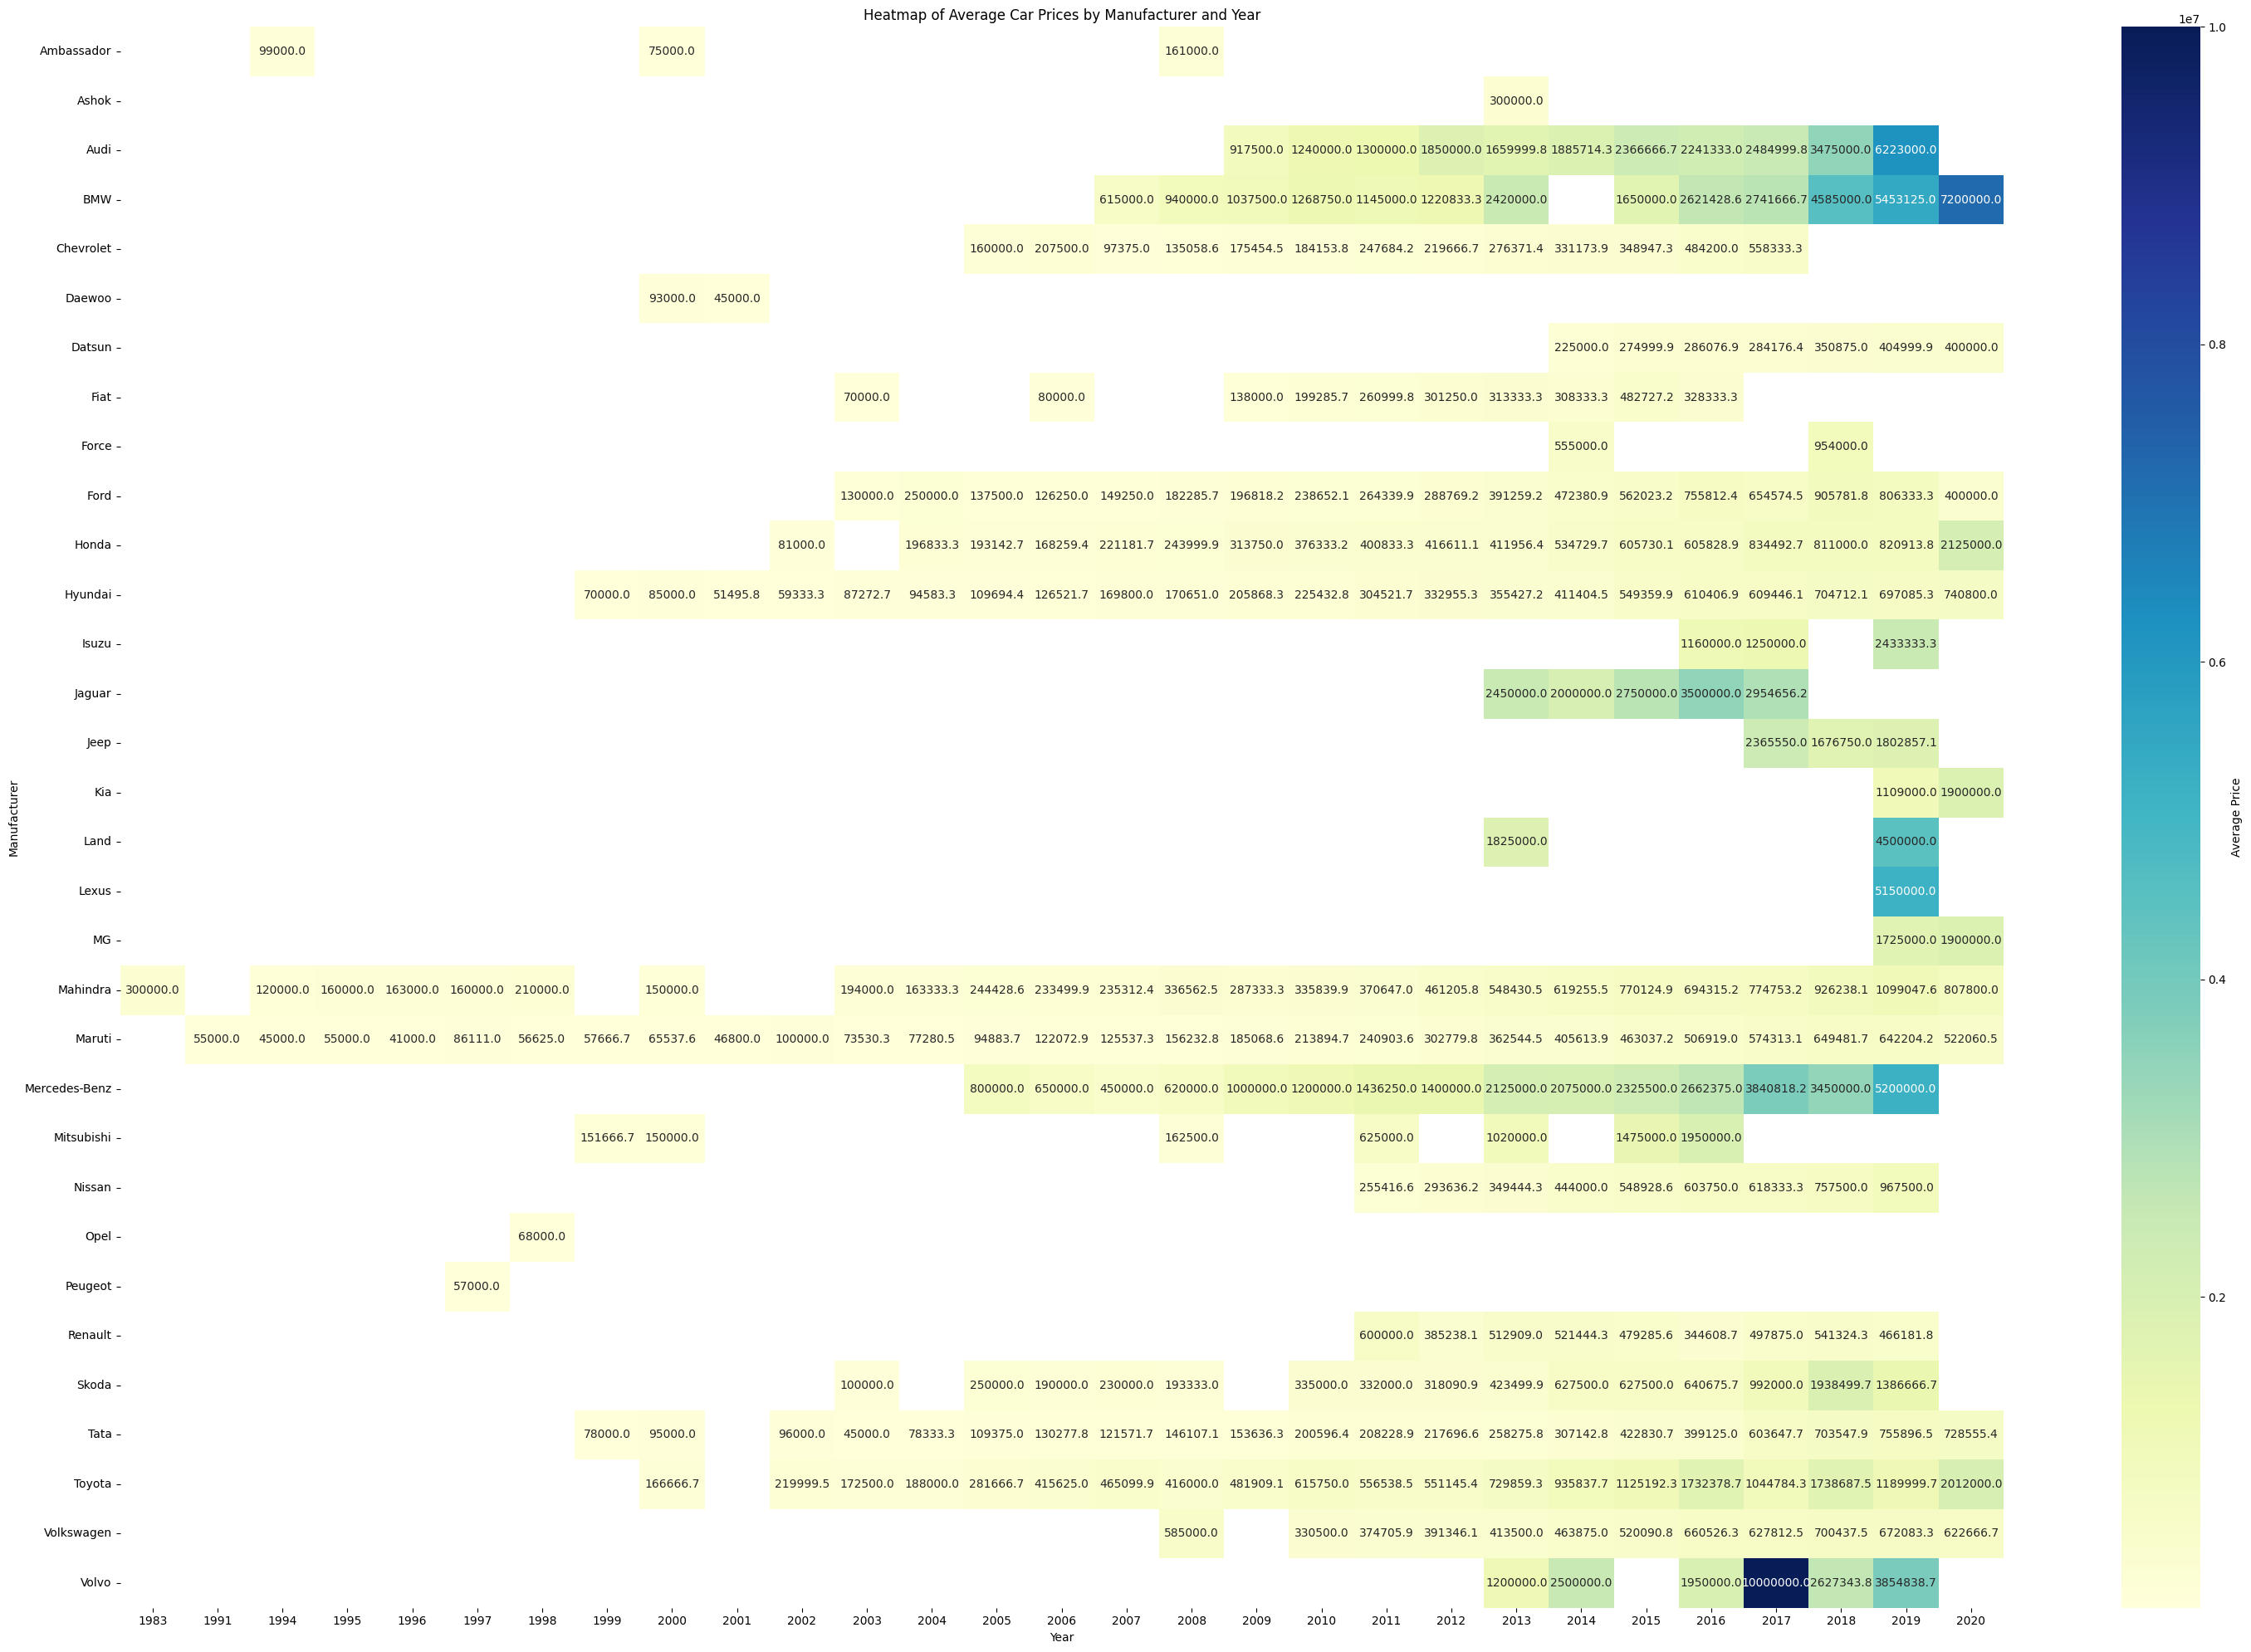

In [ ]:
# Tính trung bình giá xe của mỗi loại xe cho mỗi năm
average_prices = dataFrame.groupby(['year', 'Manufacturer'])['selling_price'].mean().reset_index()

# Tạo biểu đồ heatmap
plt.figure(figsize=(30, 20))
heatmap_data = average_prices.pivot_table(index="Manufacturer", columns="year", values="selling_price", aggfunc="mean")
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Average Price'})
plt.title('Heatmap of Average Car Prices by Manufacturer and Year')
plt.xlabel('Year')
plt.ylabel('Manufacturer')
plt.tight_layout()
plt.show()

<ipython-input-167-4a2541e5511c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transmission', y='selling_price', data=dataFrame, order=average_prices['transmission'], palette="Set3")


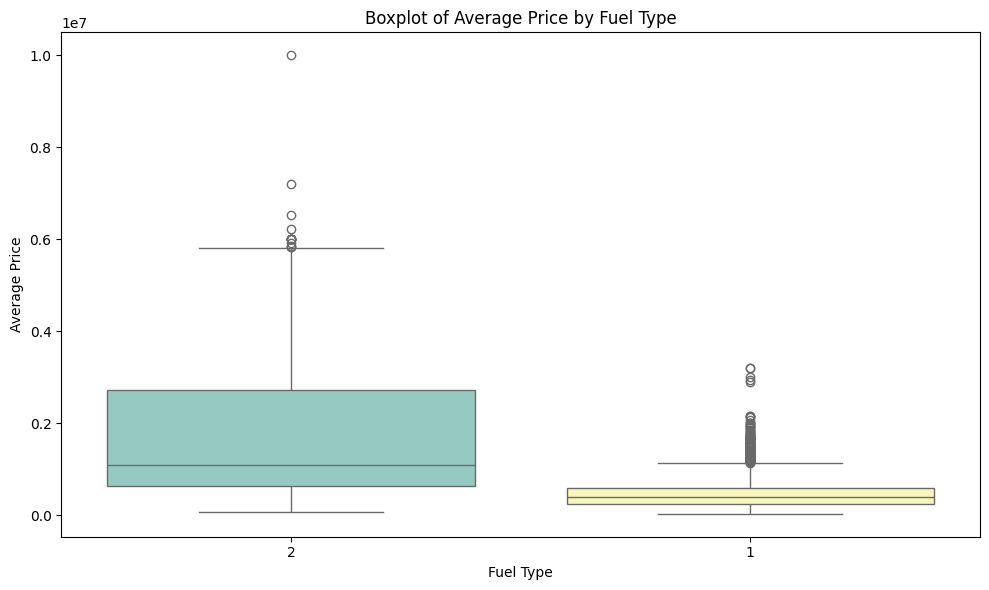

In [ ]:
average_prices = dataFrame.groupby('transmission')['selling_price'].mean().reset_index().sort_values(by='selling_price', ascending=False)

# Vẽ biểu đồ boxplot cho trung bình giá
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='selling_price', data=dataFrame, order=average_prices['transmission'], palette="Set3")
plt.title('Boxplot of Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Hồi quy tuyến tính

## Đơn biến



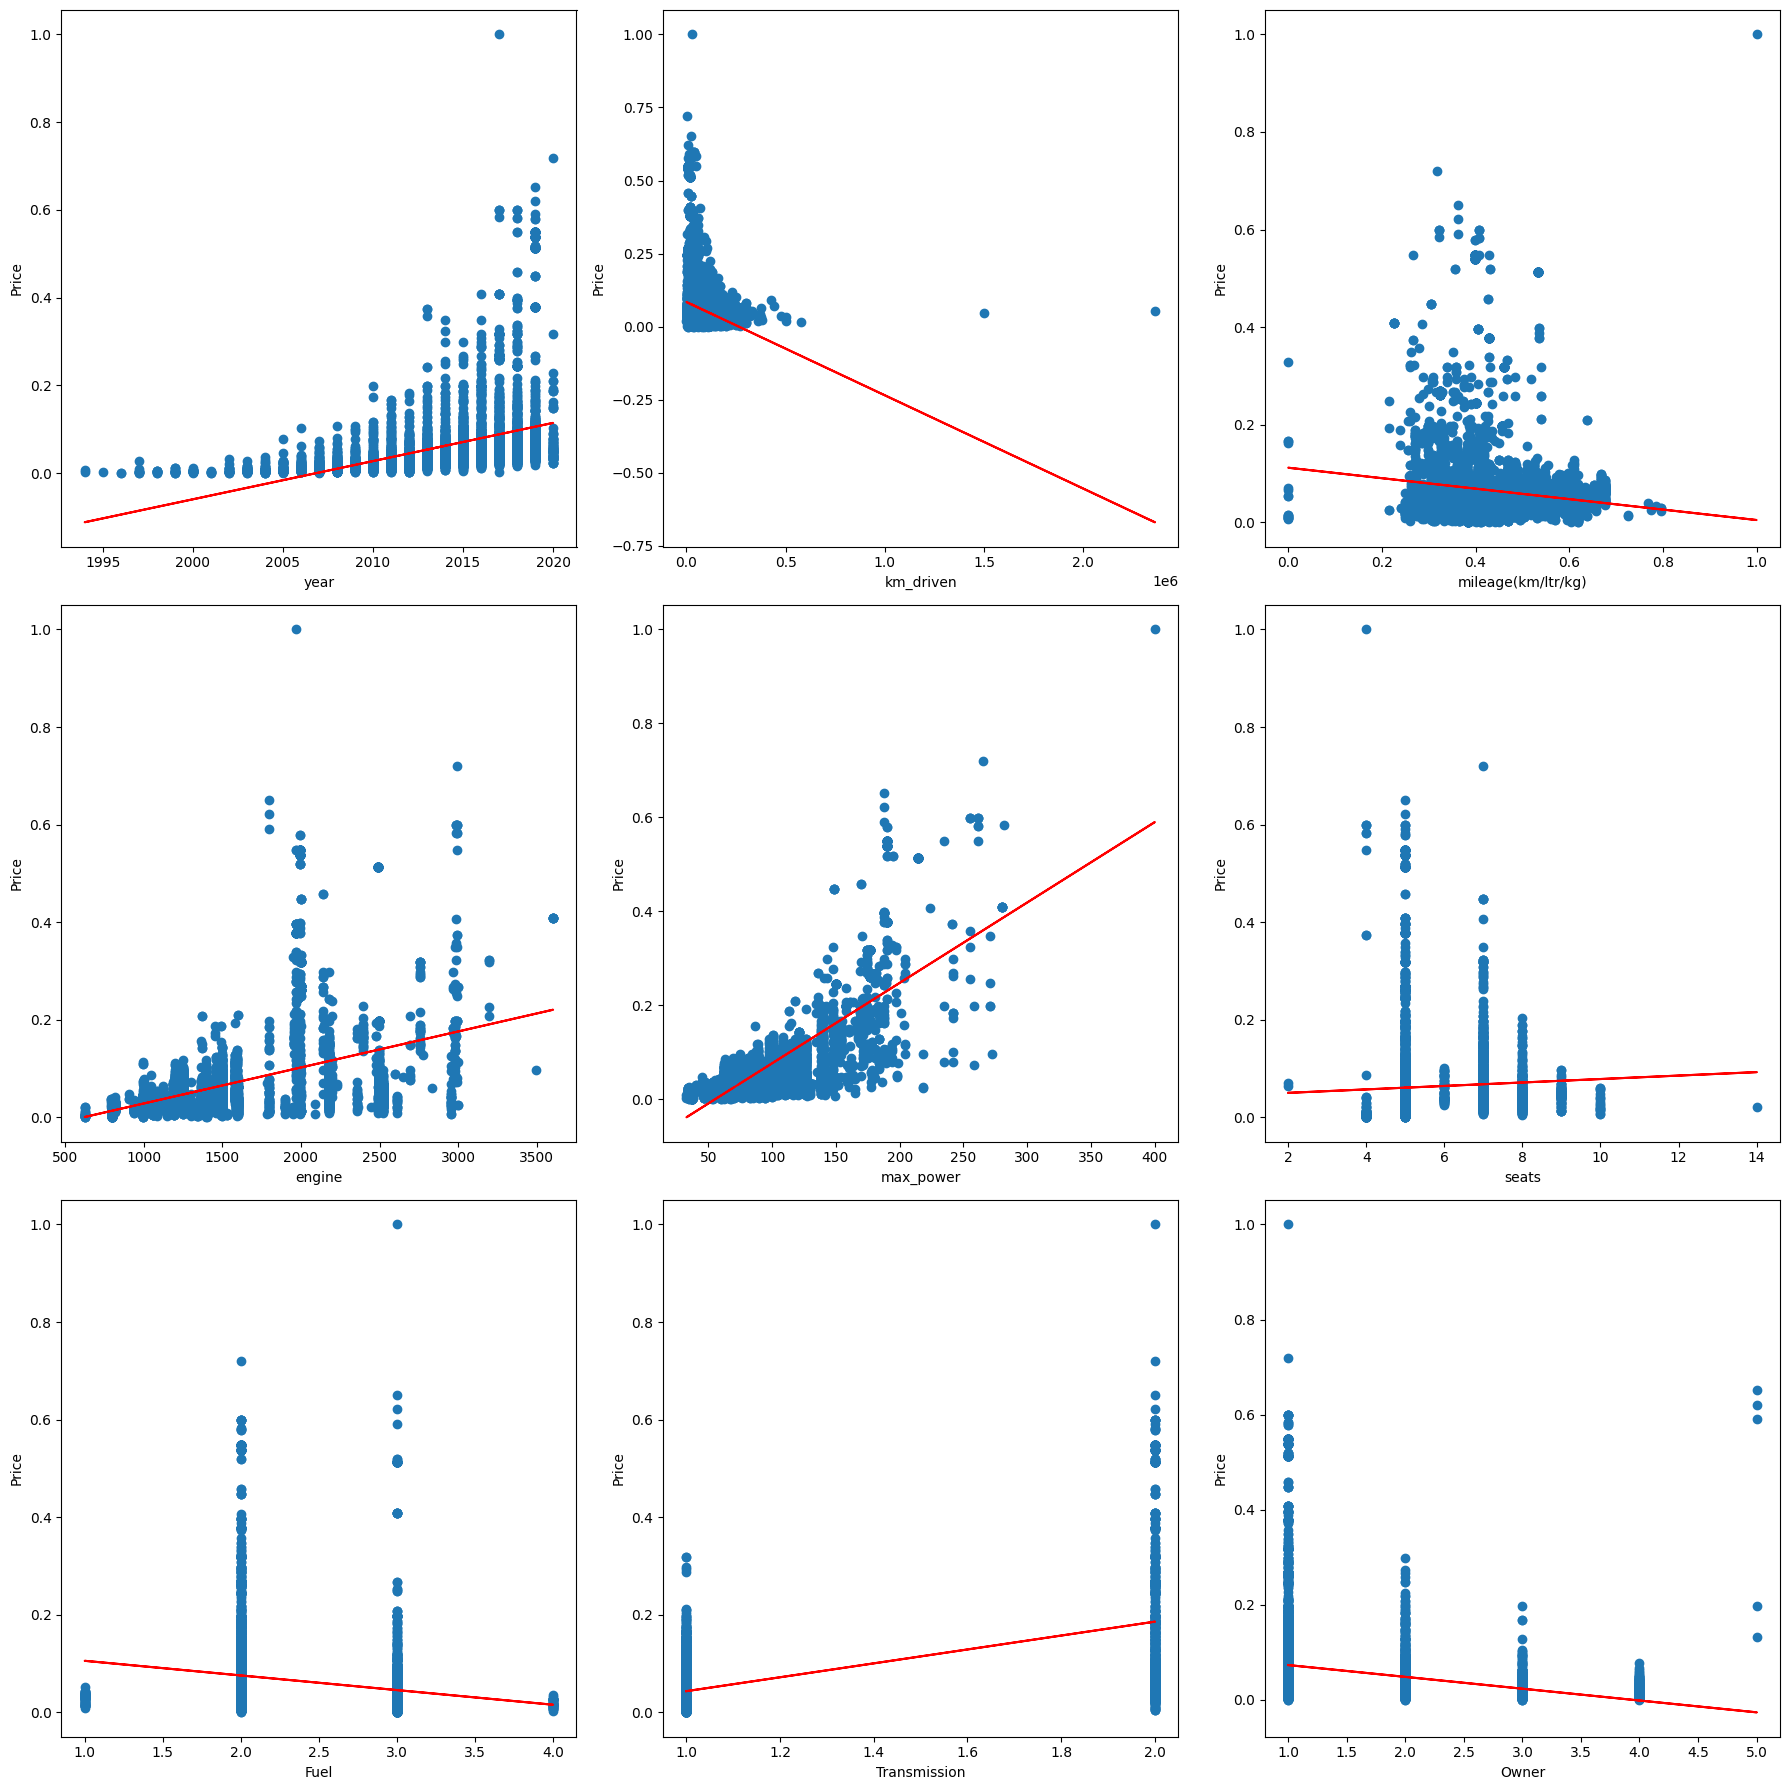

In [ ]:
X = data_numeric[['year','km_driven','mileage(km/ltr/kg)','engine','max_power', 'seats']]
Y = data_numeric['selling_price']
X['Fuel'] = dataFrame['fuel']
X['Transmission'] = dataFrame['transmission']
X['Owner'] = dataFrame['owner']


# Xử lý dữ liệu trước khi sử dụng np.polyfit
# Loại bỏ hàng có giá trị NaN
data_cleaned = pd.concat([X, Y], axis=1).dropna()

X_cleaned = data_cleaned.iloc[:, :-1]
Y_cleaned = data_cleaned.iloc[:, -1]

# Vẽ scatter plot và hồi quy
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

for i, ax in enumerate(axes.flat):
    if i < len(X_cleaned.columns):  # Kiểm tra không vượt quá số cột
        x = X_cleaned.iloc[:, i]
        y = Y_cleaned

        # Kiểm tra xem cột hiện tại có đủ dữ liệu khác biệt không
        if x.nunique() > 1:  # Đảm bảo cột có ít nhất 2 giá trị khác biệt
            ax.scatter(x, y)
            fit = np.polyfit(x, y, deg=1)
            ax.plot(x, fit[0] * x + fit[1], color='red')
            ax.set_xlabel(X_cleaned.columns[i])
            ax.set_ylabel('Price')
        else:
            ax.set_title(f"Not enough variation in {X_cleaned.columns[i]}")
            ax.axis('off')

plt.tight_layout()
plt.show()


## Đa biến


In [ ]:
# Thêm cột hằng số vào X
X = dataFrame[['year','km_driven','mileage(km/ltr/kg)','engine','max_power', 'seats']]
# Chuyển đổi tất cả các cột của X thành dạng số, xử lý lỗi bằng cách ép kiểu thành NaN
X = X.apply(pd.to_numeric, errors='coerce')
# Loại bỏ các hàng có giá trị NaN trong X
X = X.dropna()

X = sm.add_constant(X)  # Thêm cột hằng số (intercept) vào X
# Biến phụ thuộc
Y = dataFrame['selling_price']
# Đảm bảo Y cũng ở dạng số
Y = pd.to_numeric(Y, errors='coerce')
# Lọc Y để khớp với các hàng trong X sau khi loại bỏ NaN
Y = Y[X.index] # Căn chỉnh Y với X sau khi loại bỏ NaN

# Khởi tạo và fit mô hình OLS
model_OLS = sm.OLS(Y, X).fit()
# Hiển thị bảng OLS
print(model_OLS.summary())

                            OLS Regression Results                            
Dep. Variable:          selling_price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     2342.
Date:                Thu, 26 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:20:01   Log-Likelihood:            -1.1477e+05
No. Observations:                7906   AIC:                         2.296e+05
Df Residuals:                    7899   BIC:                         2.296e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -8.346e+07   3.69

In [ ]:
# chia tập train và test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 )

# tạo model
model = LinearRegression()

# train model
model.fit(X_train, Y_train)

# ktra độ chính xác
Y_pred = model.predict(X_test)
print(Y_pred.shape)

# Tính MSE và R-squared
mse = mean_squared_error(Y_test, Y_pred) # Đo lường trung bình của bình phương sai số
r2 = r2_score(Y_test, Y_pred)

# In ra MSE và R-squared
print('Mean Squared Error:', mse)
print('R-squared:', r2)
print('R Square: ', model.score(X, Y))
print('Slope: ', model.coef_)
print('intercept: ', model.intercept_)

(1582,)
Mean Squared Error: 231338105642.69382
R-squared: 0.6546250735302896
R Square:  0.6399763498332123
Slope:  [ 0.00000000e+00  4.23904220e+04 -1.27422954e+00  1.00952470e+04
  8.52669036e+01  1.59873352e+04 -6.68690445e+04]
intercept:  -86058330.84664504


In [ ]:
# import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Hàm dự đoán và tính toán các chỉ số
def my_function(Year_input, Kilometers_Driven_input, Mileage_input, Seats_input, Engine_Number_input, Power_Number_input, Transmission_input):
    # Tạo mảng dữ liệu đầu vào
    x = np.array([[Year_input, Kilometers_Driven_input, Mileage_input, Seats_input, Engine_Number_input, Power_Number_input, Transmission_input]])

    # Dự đoán giá trị (giả sử bạn đã có mô hình 'model' đã được huấn luyện)
    result = model.predict(x)

    # Tính toán các chỉ số hiệu suất
    mse = mean_squared_error(Y_test, Y_pred)  # MSE: Mean Squared Error
    r2 = r2_score(Y_test, Y_pred)  # R^2 score
    r_square = model.score(X, Y)  # R^2 từ model
    slope = model.coef_  # Hệ số góc
    intercept = model.intercept_  # Hằng số

    # In kết quả
    print(f"Dự đoán giá cho các thông số đầu vào: {result[0]}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print(f"R Square: {r_square}")
    print(f"Slope: {slope}")
    print(f"Intercept: {intercept}")

# Nhận đầu vào từ người dùng
Year_input = float(input("Nhập Year: "))
Kilometers_Driven_input = float(input("Nhập Kilometers_Driven: "))
Mileage_input = float(input("Nhập Mileage: "))
Seats_input = int(input("Nhập Seats: "))
Engine_Number_input = float(input("Nhập Engine_Number: "))
Power_Number_input = float(input("Nhập Power_Number: "))
# Fuel_Type_input = int(input("Nhập Fuel_Type('CNG': 1, 'Diesel': 2, 'Petrol': 3, 'LPG': 4): "))
Transmission_input = int(input("Nhập Transmission('Manual': 1, 'Automatic': 2): "))
# Owner_Type_input = int(input("Nhập Owner_Type('First': 1, 'Second': 2, 'Third': 3, 'Fourth & Above': 4): "))

# Gọi hàm và in kết quả
my_function(Year_input, Kilometers_Driven_input, Mileage_input, Seats_input, Engine_Number_input, Power_Number_input, Transmission_input)


Nhập Year: 2000
Nhập Kilometers_Driven: 150000
Nhập Mileage: 18
Nhập Seats: 5
Nhập Engine_Number: 1400
Nhập Power_Number: 90
Nhập Transmission('Manual': 1, 'Automatic': 2): 1
Dự đoán giá cho các thông số đầu vào: 6274046794.52926
Mean Squared Error: 231338105642.69382
R-squared: 0.6546250735302896
R Square: 0.6399763498332123
Slope: [ 0.00000000e+00  4.23904220e+04 -1.27422954e+00  1.00952470e+04
  8.52669036e+01  1.59873352e+04 -6.68690445e+04]
Intercept: -86058330.84664504


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Đề xuất

In [ ]:
# Test Ridge Regression

from sklearn.ensemble import RandomForestRegressor
from joblib import dump


# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Huấn luyện mô hình RandomForestRegressor
n_estimators_value = 100  # Số cây trong rừng, bạn có thể điều chỉnh để tối ưu mô hình
model_2 = RandomForestRegressor(n_estimators=n_estimators_value, random_state=42)
model_2.fit(X_train, Y_train)

# Lưu mô hình
# dump(model, 'random_forest_model.joblib')

# Dự đoán trên tập kiểm tra và in ra các metric đánh giá
Y_pred = model_2.predict(X_test)
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error (MAE): 61629.37
Mean Squared Error (MSE): 11490808772.06
R^2 Score: 0.98
